<a href="https://colab.research.google.com/github/knoppin1/DATA-606/blob/main/county_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

In [ ]:
wd = os.getcwd()
wd

'C:\\Users\\Ken\\Documents\\Ken\\College\\UMBC\\Data_Science\\DATA_606_Capstone_in_Data_Science\\Project'

In [ ]:
os.listdir(wd)

['.ipynb_checkpoints',
 'co-est2019-alldata.csv',
 'county_income.ipynb',
 'county_population.ipynb',
 'county_vaccinations.ipynb',
 'covid-19.jpg',
 'COVID-19.png',
 'COVID-19_Vaccinations_in_the_United_States_County.csv',
 'lapi1120.xlsx',
 'Untitled.ipynb',
 'vaccinations.pkl',
 '~$lapi1120.xlsx']

In [ ]:
income_file = wd + '\\' + 'lapi1120.xlsx'
income_file

'C:\\Users\\Ken\\Documents\\Ken\\College\\UMBC\\Data_Science\\DATA_606_Capstone_in_Data_Science\\Project\\lapi1120.xlsx'

In [ ]:
df = pd.read_excel(income_file, skiprows = 3, skipfooter=3)
df.shape

(3217, 8)

In [ ]:
df.head(5)

,Unnamed: 0,2017,2018,2019,2019.1,2018.1,2019.2,2019.3
0,United States,52118.0,54606.0,56490.0,--,4.8,3.5,--
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,41030.0,42710.0,44145.0,--,4.1,3.4,--
3,Autauga,41101.0,42504.0,43917.0,10,3.4,3.3,37
4,Baldwin,44566.0,46205.0,47485.0,4,3.7,2.8,48


In [ ]:
df = df.drop([2017, 2018, '2019.1', '2018.1','2019.2','2019.3'], axis=1)
df.columns

Index(['Unnamed: 0', 2019], dtype='object')

In [ ]:
df.rename(columns={'Unnamed: 0': 'County', 2019: 'Income'}, inplace=True)
df.columns

Index(['County', 'Income'], dtype='object')

In [ ]:
df.head(3)

,County,Income
0,United States,56490.0
1,NaN,NaN
2,Alabama,44145.0


Remove unneeded rows.

In [ ]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,County,Income
1,NaN,NaN
70,NaN,NaN
101,NaN,NaN
118,NaN,NaN
195,NaN,NaN
255,NaN,NaN
321,NaN,NaN
331,NaN,NaN
336,NaN,NaN
338,NaN,NaN


In [ ]:
# Remove 'Independent cities:' row
df = df[~(df["County"] =="Independent cities:")].reset_index(drop=True)

# Remove 'Combination areas2:' row
df = df[~(df["County"] =="Combination areas2:")].reset_index(drop=True)

In [ ]:
df.shape

(3215, 2)

In [ ]:
new_nan_df = df[df.isna().any(axis=1)]
new_nan_df

,County,Income
1,NaN,NaN
70,NaN,NaN
101,NaN,NaN
118,NaN,NaN
195,NaN,NaN
255,NaN,NaN
321,NaN,NaN
331,NaN,NaN
336,NaN,NaN
338,NaN,NaN


In [ ]:
states = ['Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','District of Columbia','Delaware',
          'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine',
          'Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada',
          'New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma',
          'Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont',
          'Virginia','Washington','West Virginia','Wisconsin','Wyoming']
len(states)

51

In [ ]:
# Create a list of all the state indexes
state_indexes = []
for index, row in new_nan_df.iterrows():
    # The row after a NaN row is a State
    state_indexes.append(index+1)
len(state_indexes)

51

Add the 'State' column and reorder the columns.

In [ ]:
df['State'] = ''
df = df[['State','County','Income']]
df.columns

Index(['State', 'County', 'Income'], dtype='object')

Iterate the list of state indexes and set the 'State' column value for each county record until the index of the next state is encountered.

In [ ]:
state_counter = 0
for i in state_indexes:
   
    state = df.iloc[i].County
    # print('***')
    print(i,'\t',state)
    
    for index, row in df.iterrows():
        if (state_counter + 1) < len(state_indexes):
            next_state_index = state_indexes[state_counter + 1]-1
        else:
            next_state_index = 99999
        if (index > i and index < next_state_index):
            #print(index,'\t',state,'\t',df.iloc[index].County)
            df.iloc[index, df.columns.get_loc('State')] = state
            #df.ix[index,'State'] = state # Depreciated approach
    state_counter += 1

2 	 Alabama
71 	 Alaska
102 	 Arizona
119 	 Arkansas
196 	 California
256 	 Colorado
322 	 Connecticut
332 	 Delaware
337 	 District of Columbia
339 	 Florida
408 	 Georgia
569 	 Hawaii
575 	 Idaho
621 	 Illinois
725 	 Indiana
819 	 Iowa
920 	 Kansas
1027 	 Kentucky
1149 	 Louisiana
1215 	 Maine
1233 	 Maryland
1259 	 Massachusetts
1275 	 Michigan
1360 	 Minnesota
1449 	 Mississippi
1533 	 Missouri
1650 	 Montana
1708 	 Nebraska
1803 	 Nevada
1822 	 New Hampshire
1834 	 New Jersey
1857 	 New Mexico
1892 	 New York
1956 	 North Carolina
2058 	 North Dakota
2113 	 Ohio
2203 	 Oklahoma
2282 	 Oregon
2320 	 Pennsylvania
2389 	 Rhode Island
2396 	 South Carolina
2444 	 South Dakota
2512 	 Tennessee
2609 	 Texas
2865 	 Utah
2896 	 Vermont
2912 	 Virginia
3019 	 Washington
3060 	 West Virginia
3117 	 Wisconsin
3191 	 Wyoming


In [ ]:
df.tail(5)

,State,County,Income
3210,Wyoming,Sweetwater,57225.0
3211,Wyoming,Teton,229825.0
3212,Wyoming,Uinta,41912.0
3213,Wyoming,Washakie,50735.0
3214,Wyoming,Weston,46655.0


Drop all NaN rows.

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

# Verify there are no remaining NaNs.
df.isnull().sum().sum()

0

In [ ]:
df.dtypes

State      object
County     object
Income    float64
dtype: object

In [ ]:
df = df.astype({'Income': np.int64})
df.head(5)

,State,County,Income
0,,United States,56490
2,,Alabama,44145
3,Alabama,Autauga,43917
4,Alabama,Baldwin,47485
5,Alabama,Barbour,35763


The study does not plan to use country and state median incomes, so limit the dataframe to only county rows.

In [ ]:
df = df[df['State'].isin(states)].reset_index(drop=True)

In [ ]:
df.sort_values(by='Income',ascending=False)

,State,County,Income
3108,Wyoming,Teton,229825
1856,New York,New York,197847
293,Colorado,Pitkin,158313
71,Alaska,Bristol Bay Borough,151900
2796,Utah,Summit,151326
206,California,Marin,141735
223,California,San Francisco,139405
1224,Massachusetts,Nantucket,136204
226,California,San Mateo,134107
2685,Texas,Midland,130983


In [ ]:
df.describe(include="all")

,State,County,Income
count,3112,3112,3112.000000
unique,50,1828,NaN
top,Texas,Washington,NaN
freq,254,30,NaN
mean,NaN,NaN,45931.651028
std,NaN,NaN,13238.436683
min,NaN,NaN,19472.000000
25%,NaN,NaN,37873.250000
50%,NaN,NaN,43420.500000
75%,NaN,NaN,50690.000000


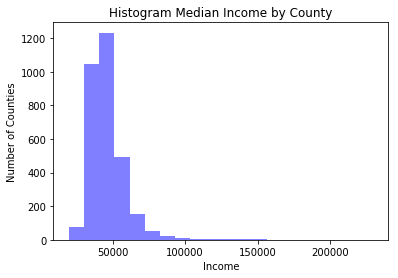

In [ ]:
import matplotlib.pyplot as plt

num_bins = 20
n, bins, patches = plt.hist(df['Income'], num_bins, facecolor='blue', alpha=0.5) 

plt.xlabel('Income')
plt.ylabel('Number of Counties')
plt.title(r'Histogram Median Income by County')
plt.show()

In [ ]:
incomes = sorted(df['Income'])

out_threshold = 100000
incomes = [i for i in incomes if i < out_threshold]
len(incomes)

3091

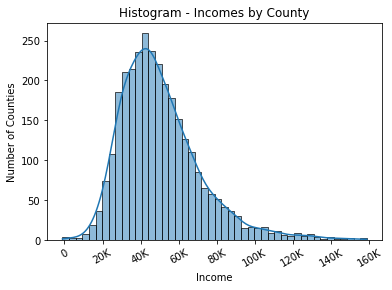

In [ ]:
g = sns.histplot(data=incomes, kde=True)
g.set_xticklabels(labels=['','0','20K','40K','60K','80K','100K','120K','140K','160K'], rotation=30)
g.set_title("Histogram - Incomes by County")
g.set_xlabel("Income")
g.set_ylabel("Number of Counties")
plt.show()

In [ ]:
df.head()

,State,County,Income
0,Alabama,Autauga,43917
1,Alabama,Baldwin,47485
2,Alabama,Barbour,35763
3,Alabama,Bibb,31725
4,Alabama,Blount,36412


In [ ]:
import pickle
df.to_pickle("./incomes.pkl")